# Real-world data


The section reports the performances that are obtained on real-world data using neural network architectures. The dataset is the same as in [Chapter 3, Section 5](Baseline_FDS_RealWorldData). Results are reported following the prequential grid search methodology used in the previous sections with simulated data. 

We first report the performances for the feed-forward neural network, the convolutional neural network, the long short term memory, and the LSTM with attention. We also considered variations in the hyperparameters:
* `Feed-forward Neural Network`: 2 layers, 500 neurons, a dropout level of 0 or 0.2, Adam with a learning rate of 0.001 or 0.0001, 5, 10 or 20 epochs, and a batch size of 64, 128, or 256. 
* `Convolutional Neural Network`: 2 convolutional layers with 200 filters of size 2, 1 hidden layer with 500 neurons, a dropout level of 0 or 0.2, Adam with a learning rate of 0.001 or 0.0001, 5, 10 or 20 epochs, and a batch size of 64, 128 or 256.
* `Long Short Term Memory`: 1 recurrent layer with 200 neurons for the hidden state, 1 hidden layer with 500 neurons, a dropout level of 0 or 0.2, Adam with a learning rate of 0.001 or 0.0001, 5, 10 or 20 epochs, and a batch size of 64, 128 or 256.
* `Long Short Term Memory with Attention`: 1 recurrent layer with 200 neurons for the hidden state, 1 hidden layer with 500 neurons, a dropout level of 0 or 0.2, Adam with a learning rate of 0.001 or 0.0001, 5, 10 or 20 epochs, and a batch size of 64, 128 or 256.


We finally report global results and compare them to the other supervised baselines (decision tree, logistic regression, random forest, and XGBoost).

In [1]:
# Initialization: Load shared functions

# Load shared functions
!curl -O https://raw.githubusercontent.com/Fraud-Detection-Handbook/fraud-detection-handbook/main/Chapter_References/shared_functions.py
%run shared_functions.py
#%run ../Chapter_References/shared_functions.ipynb

## Feed-forward neural network

In [2]:
filehandler = open('performances_model_selection_nn_real_data.pkl', 'rb') 
(performances_df_dictionary, execution_times) = pickle.load(filehandler)

The results for the feed-forward network are reported below. Let us first have a look at global trends with the performance summary.

In [3]:
performances_df_nn = performances_df_dictionary['Neural Network']

In [4]:
summary_performances_nn=get_summary_performances(performances_df_nn, parameter_column_name="Parameters summary")
summary_performances_nn

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,0.0001/128/20/0.2/2,0.0001/128/20/0.2/2,0.0001/256/10/0/2
Validation performance,0.874+/-0.02,0.079+/-0.03,0.218+/-0.04
Test performance,0.894+/-0.01,0.084+/-0.02,0.236+/-0.04
Optimal parameter(s),0.001/256/20/0.2/2,0.0001/64/20/0.2/2,0.0001/256/10/0/2
Optimal test performance,0.898+/-0.01,0.085+/-0.01,0.236+/-0.04


As well as for the synthetic data, the optimal set of hyperparameters strongly depends on the metric. The smallest learning rate `0.0001`, and the largest number of epochs `20` are slightly favored. Let us consider these values and visualize the impact of the batch size and dropout level.

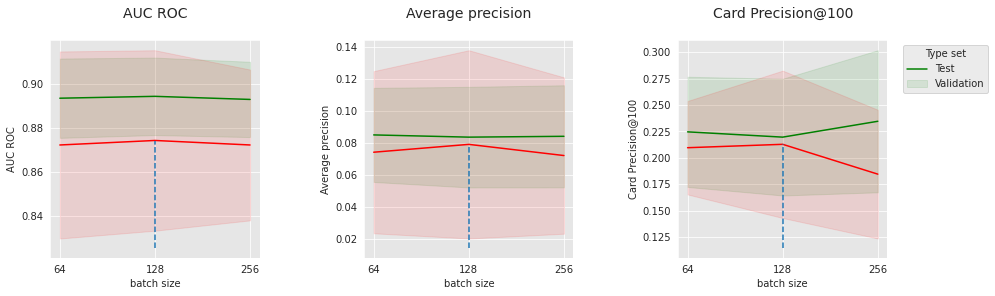

In [5]:
parameters_dict=dict(performances_df_nn['Parameters'])
performances_df_nn['Parameters summary']=[
                                   str(parameters_dict[i]['clf__batch_size'])    
                                   for i in range(len(parameters_dict))]
performances_df_nn_subset = performances_df_nn[performances_df_nn['Parameters'].apply(lambda x:x['clf__lr']== 0.0001 and x['clf__module__hidden_size']==500 and x['clf__module__num_layers']==2 and x['clf__module__p']==0.2 and x['clf__max_epochs']==20).values]
summary_performances_nn_subset=get_summary_performances(performances_df_nn_subset, parameter_column_name="Parameters summary")
indexes_summary = summary_performances_nn_subset.index.values
indexes_summary[0] = 'Best estimated parameters'
summary_performances_nn_subset.rename(index = dict(zip(np.arange(len(indexes_summary)),indexes_summary)))
get_performances_plots(performances_df_nn_subset, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="batch size",
                       summary_performances=summary_performances_nn_subset)

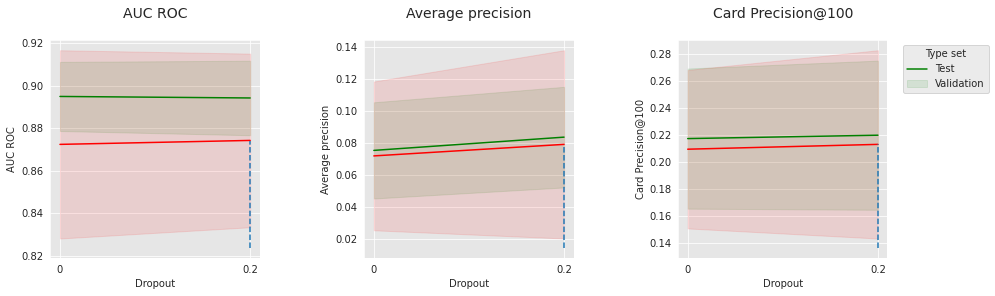

In [6]:
parameters_dict=dict(performances_df_nn['Parameters'])
performances_df_nn['Parameters summary']=[
                                   str(parameters_dict[i]['clf__module__p'])    
                                   for i in range(len(parameters_dict))]
performances_df_nn_subset = performances_df_nn[performances_df_nn['Parameters'].apply(lambda x:x['clf__lr']== 0.0001 and x['clf__module__hidden_size']==500 and x['clf__module__num_layers']==2 and x['clf__max_epochs']==20 and x['clf__batch_size']==128).values]
summary_performances_nn_subset=get_summary_performances(performances_df_nn_subset, parameter_column_name="Parameters summary")
indexes_summary = summary_performances_nn_subset.index.values
indexes_summary[0] = 'Best estimated parameters'
summary_performances_nn_subset.rename(index = dict(zip(np.arange(len(indexes_summary)),indexes_summary)))
get_performances_plots(performances_df_nn_subset, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="Dropout",
                       summary_performances=summary_performances_nn_subset)

Similar to results on synthetic data, these hyperparameters related to optimization all have sweet spots that depend on each other. This confirms the importance of tuning for this kind of model.

Overall, our simple feed-forward neural network reaches a competitive performance. It is comparable to the Random Forest baseline on the real-world data (global comparison at the end), which is very promising for applications to incremental fraud detection systems.

## Sequential models

Let us now analyze the performance of sequential models on real-world data with respect to some of their optimization parameters. 

In [7]:
filehandler = open('performances_model_selection_seq_model_real_data.pkl', 'rb') 
(performances_df_dictionary_seq_model, execution_times) = pickle.load(filehandler)

In [8]:
performances_df_cnn=performances_df_dictionary_seq_model['CNN']
summary_performances_cnn=get_summary_performances(performances_df_cnn, parameter_column_name="Parameters summary")

performances_df_lstm=performances_df_dictionary_seq_model['LSTM']
summary_performances_lstm=get_summary_performances(performances_df_lstm, parameter_column_name="Parameters summary")

performances_df_lstm_attn=performances_df_dictionary_seq_model['LSTM_Attention']
summary_performances_lstm_attn=get_summary_performances(performances_df_lstm_attn, parameter_column_name="Parameters summary")

### Convolutional Neural Network

We start with the 1D convolutional neural network. The performance summary and the impact of batch size, number of epochs, and dropout are analyzed.

In [9]:
summary_performances_cnn

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,5/2/256/200/0,10/2/256/200/0,10/2/128/200/0
Validation performance,0.864+/-0.02,0.098+/-0.03,0.227+/-0.03
Test performance,0.882+/-0.01,0.093+/-0.02,0.221+/-0.03
Optimal parameter(s),5/2/128/200/0,5/2/256/200/0,5/2/64/200/0.2
Optimal test performance,0.884+/-0.01,0.103+/-0.02,0.245+/-0.02


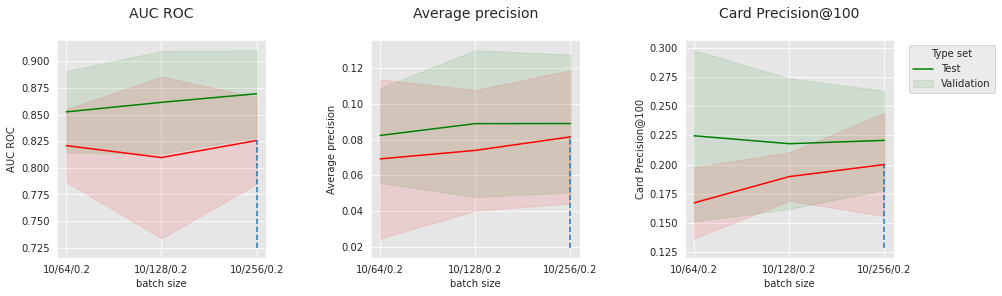

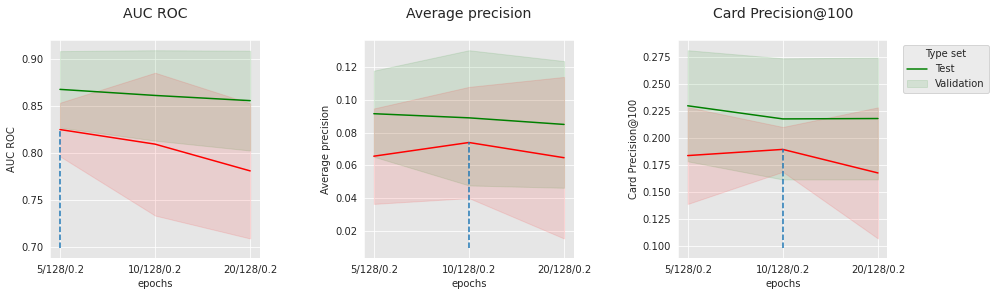

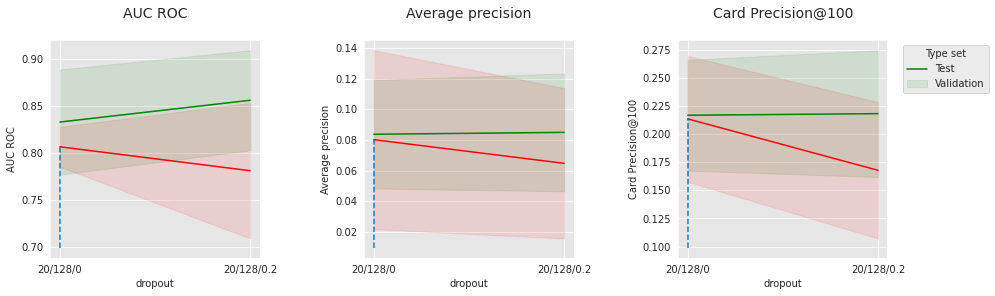

In [10]:
parameters_dict=dict(performances_df_cnn['Parameters'])
performances_df_cnn['Parameters summary']=[str(parameters_dict[i]['clf__max_epochs'])+
                                   '/'+
                                   str(parameters_dict[i]['clf__batch_size'])+
                                   '/'+    
                                   str(parameters_dict[i]['clf__module__p'])
                                   for i in range(len(parameters_dict))]

performances_df_cnn_subset = performances_df_cnn[performances_df_cnn['Parameters'].apply(lambda x:x['clf__lr']== 0.0001 and x['clf__module__num_filters']==200 and x['clf__max_epochs']==10 and x['clf__module__num_conv']==2 and x['clf__module__p']==0.2).values]
summary_performances_cnn_subset=get_summary_performances(performances_df_cnn_subset, parameter_column_name="Parameters summary")
indexes_summary = summary_performances_cnn_subset.index.values
indexes_summary[0] = 'Best estimated parameters'
summary_performances_cnn_subset.rename(index = dict(zip(np.arange(len(indexes_summary)),indexes_summary)))
get_performances_plots(performances_df_cnn_subset, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="batch size",
                       summary_performances=summary_performances_cnn_subset)

performances_df_cnn_subset = performances_df_cnn[performances_df_cnn['Parameters'].apply(lambda x:x['clf__lr']== 0.0001 and x['clf__module__num_filters']==200 and x['clf__batch_size']==128 and x['clf__module__num_conv']==2 and x['clf__module__p']==0.2).values]
summary_performances_cnn_subset=get_summary_performances(performances_df_cnn_subset, parameter_column_name="Parameters summary")
indexes_summary = summary_performances_cnn_subset.index.values
indexes_summary[0] = 'Best estimated parameters'
summary_performances_cnn_subset.rename(index = dict(zip(np.arange(len(indexes_summary)),indexes_summary)))
get_performances_plots(performances_df_cnn_subset, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="epochs",
                       summary_performances=summary_performances_cnn_subset)

performances_df_cnn_subset = performances_df_cnn[performances_df_cnn['Parameters'].apply(lambda x:x['clf__lr']== 0.0001 and x['clf__module__num_filters']==200 and x['clf__batch_size']==128 and x['clf__module__num_conv']==2 and x['clf__max_epochs']==20).values]
summary_performances_cnn_subset=get_summary_performances(performances_df_cnn_subset, parameter_column_name="Parameters summary")
indexes_summary = summary_performances_cnn_subset.index.values
indexes_summary[0] = 'Best estimated parameters'
summary_performances_cnn_subset.rename(index = dict(zip(np.arange(len(indexes_summary)),indexes_summary)))
get_performances_plots(performances_df_cnn_subset, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="dropout",
                       summary_performances=summary_performances_cnn_subset)

Similar to the regular neural network, the performance highly depends on the optimization parameters. A little level of dropout appears to be beneficial, in particular on the test dataset, where the distribution is further from the training distribution.


Overall, except for the AUC ROC, the 1D convolutional neural network is able to outperform the feed-forward neural network and obtain a very competitive Average precision.

### Long Short Term Memory

Let us carry on with the LSTM. 

In [11]:
summary_performances_lstm

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,5/128/200/0.2,5/256/200/0.2,5/64/200/0
Validation performance,0.873+/-0.02,0.109+/-0.04,0.238+/-0.02
Test performance,0.892+/-0.0,0.104+/-0.03,0.22+/-0.03
Optimal parameter(s),5/256/200/0.2,5/128/200/0,5/256/200/0
Optimal test performance,0.893+/-0.01,0.11+/-0.02,0.24+/-0.03


The long short term memory globally outperforms the convolutional neural network on the test datasets and obtains the best average precision overall.

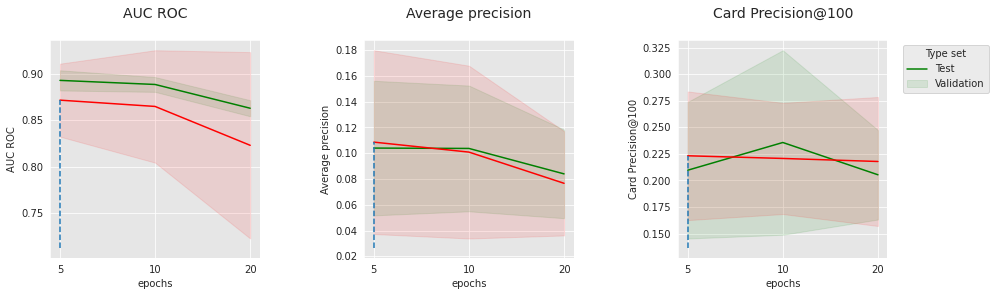

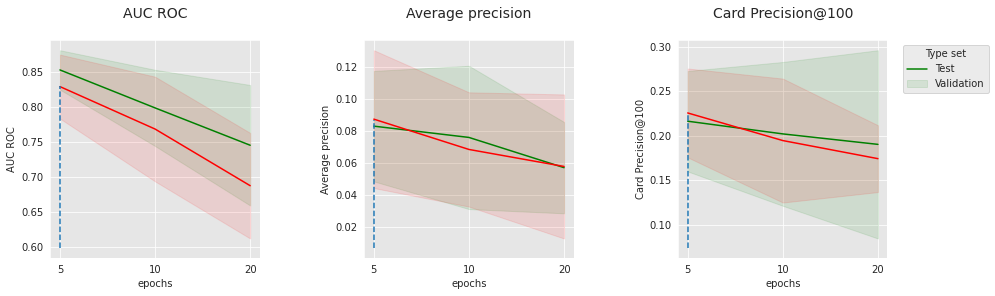

In [12]:
parameters_dict=dict(performances_df_lstm['Parameters'])
performances_df_lstm['Parameters summary']=[str(parameters_dict[i]['clf__max_epochs'])
                                            for i in range(len(parameters_dict))]

performances_df_lstm_subset = performances_df_lstm[performances_df_lstm['Parameters'].apply(lambda x:x['clf__lr']== 0.0001 and x['clf__batch_size']==256 and x['clf__module__hidden_size_lstm']==200 and x['clf__module__p']==0.2).values]
summary_performances_lstm_subset=get_summary_performances(performances_df_lstm_subset, parameter_column_name="Parameters summary")
indexes_summary = summary_performances_lstm_subset.index.values
indexes_summary[0] = 'Best estimated parameters'
summary_performances_lstm_subset.rename(index = dict(zip(np.arange(len(indexes_summary)),indexes_summary)))
get_performances_plots(performances_df_lstm_subset, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="epochs",
                       summary_performances=summary_performances_lstm_subset)

performances_df_lstm_subset = performances_df_lstm[performances_df_lstm['Parameters'].apply(lambda x:x['clf__lr']== 0.001 and x['clf__batch_size']==64 and x['clf__module__hidden_size_lstm']==200 and x['clf__module__p']==0.2).values]
summary_performances_lstm_subset=get_summary_performances(performances_df_lstm_subset, parameter_column_name="Parameters summary")
indexes_summary = summary_performances_lstm_subset.index.values
indexes_summary[0] = 'Best estimated parameters'
summary_performances_lstm_subset.rename(index = dict(zip(np.arange(len(indexes_summary)),indexes_summary)))
get_performances_plots(performances_df_lstm_subset, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="epochs",
                       summary_performances=summary_performances_lstm_subset)

The charts above show the evolution of the three metrics with the number of epochs, for the two extreme sets of "convergence"-related hyperparameters. On the top charts, the learning rate is `0.0001`, and the batch size is `256`. On the bottom charts, the learning rate is `0.001`, and the batch size is `64`. The best performance is obtained for the lowest learning rate, the largest batch size, and the lowest number of epochs which suggests that reducing the convergence speed or the number of epochs could potentially push the performance further. In spite of this, the optimal performance on the test sets is already very competitive with the baseline (see the results at the end of this section).

### LSTM with Attention

For the LSTM with Attention, we finally perform the exact same analysis as for the regular LSTM. The results, shown below, are slightly better and could also be improved by performing fewer optimization steps or by slowing down the convergence. 

In [13]:
summary_performances_lstm_attn

,AUC ROC,Average precision,Card Precision@100
Best estimated parameters,5/128/200/0.2,5/128/200/0.2,10/128/200/0
Validation performance,0.89+/-0.01,0.105+/-0.03,0.243+/-0.03
Test performance,0.898+/-0.01,0.105+/-0.02,0.232+/-0.03
Optimal parameter(s),5/256/200/0,5/256/200/0.2,5/128/200/0
Optimal test performance,0.899+/-0.01,0.113+/-0.03,0.247+/-0.02


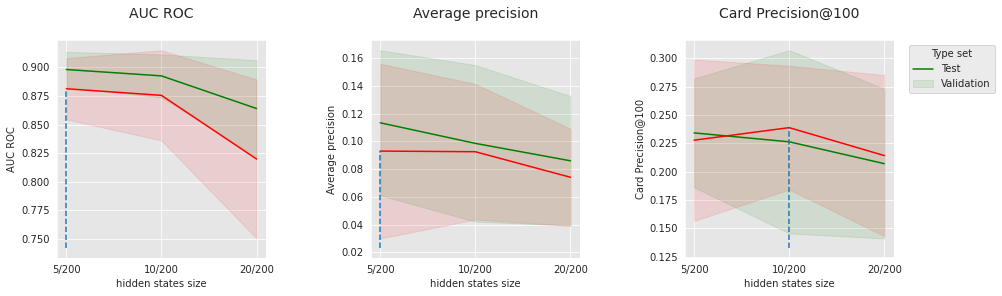

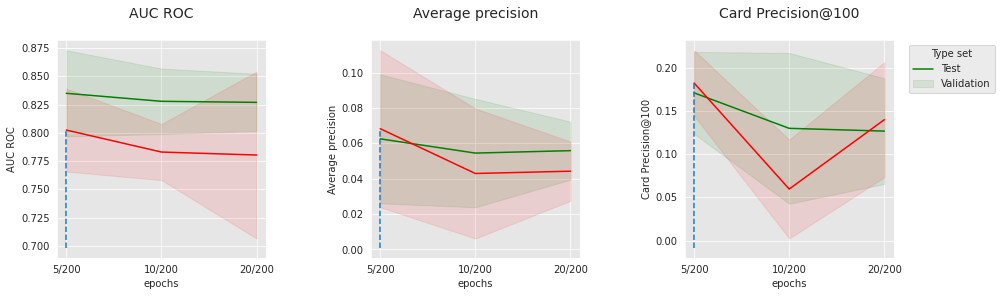

In [14]:
parameters_dict=dict(performances_df_lstm_attn['Parameters'])
performances_df_lstm_attn['Parameters summary']=[str(parameters_dict[i]['clf__max_epochs'])+
                                   '/'+
                                   str(parameters_dict[i]['clf__module__hidden_size_lstm'])
                                   for i in range(len(parameters_dict))]

performances_df_lstm_attn_subset = performances_df_lstm_attn[performances_df_lstm_attn['Parameters'].apply(lambda x:x['clf__lr']== 0.0001 and x['clf__batch_size']==256 and x['clf__module__hidden_size_lstm']==200 and x['clf__module__p']==0.2).values]
summary_performances_lstm_attn_subset=get_summary_performances(performances_df_lstm_attn_subset, parameter_column_name="Parameters summary")
indexes_summary = summary_performances_lstm_attn_subset.index.values
indexes_summary[0] = 'Best estimated parameters'
summary_performances_lstm_attn_subset.rename(index = dict(zip(np.arange(len(indexes_summary)),indexes_summary)))
get_performances_plots(performances_df_lstm_attn_subset, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="hidden states size",
                       summary_performances=summary_performances_lstm_attn_subset)

performances_df_lstm_attn_subset = performances_df_lstm_attn[performances_df_lstm_attn['Parameters'].apply(lambda x:x['clf__lr']== 0.001 and x['clf__batch_size']==64 and x['clf__module__hidden_size_lstm']==200 and x['clf__module__p']==0.2).values]
summary_performances_lstm_attn_subset=get_summary_performances(performances_df_lstm_attn_subset, parameter_column_name="Parameters summary")
indexes_summary = summary_performances_lstm_attn_subset.index.values
indexes_summary[0] = 'Best estimated parameters'
summary_performances_lstm_attn_subset.rename(index = dict(zip(np.arange(len(indexes_summary)),indexes_summary)))
get_performances_plots(performances_df_lstm_attn_subset, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Validation'], expe_type_color_list=['#008000','#FF0000'],
                       parameter_name="epochs",
                       summary_performances=summary_performances_lstm_attn_subset)

## Global comparison

To contrast the results obtained on the simulated dataset in previous sections, let us also make here a complete comparison of the approaches (baselines and deep learning models) on the real-world data. In particular, let us complement the results above with the ones obtained with baseline models (the Linear Regression, the Decision Tree, the Random Forest, and XGBoost) and display everything on a global table.

In [15]:
# Load performance results for decision tree, logistic regression, random forest and XGBoost
filehandler = open('../Chapter_5_ModelValidationAndSelection/images/performances_model_selection_real_world_data.pkl', 'rb') 
(performances_df_dictionary, execution_times) = pickle.load(filehandler)

# Load performance results for feed-forward neural network
filehandler = open('performances_model_selection_nn_real_data.pkl', 'rb') 
(performances_df_dictionary_nn, execution_times_nn) = pickle.load(filehandler)

# Load performance results for CNN, LSTM and LSTM with Attention
filehandler = open('performances_model_selection_seq_model_real_data.pkl', 'rb') 
(performances_df_dictionary_seq_model, execution_times_seq_model) = pickle.load(filehandler)

In [16]:
performances_df_dt=performances_df_dictionary['Decision Tree']
summary_performances_dt=get_summary_performances(performances_df_dt, parameter_column_name="Parameters summary")

performances_df_lr=performances_df_dictionary['Logistic Regression']
summary_performances_lr=get_summary_performances(performances_df_lr, parameter_column_name="Parameters summary")

performances_df_rf=performances_df_dictionary['Random Forest']
summary_performances_rf=get_summary_performances(performances_df_rf, parameter_column_name="Parameters summary")

performances_df_xgboost=performances_df_dictionary['XGBoost']
summary_performances_xgboost=get_summary_performances(performances_df_xgboost, parameter_column_name="Parameters summary")

performances_df_nn=performances_df_dictionary_nn['Neural Network']
summary_performances_nn=get_summary_performances(performances_df_nn, parameter_column_name="Parameters summary")

performances_df_cnn=performances_df_dictionary_seq_model['CNN']
summary_performances_cnn=get_summary_performances(performances_df_cnn, parameter_column_name="Parameters summary")

performances_df_lstm=performances_df_dictionary_seq_model['LSTM']
summary_performances_lstm=get_summary_performances(performances_df_lstm, parameter_column_name="Parameters summary")

performances_df_lstm_attention=performances_df_dictionary_seq_model['LSTM_Attention']
summary_performances_lstm_attention=get_summary_performances(performances_df_lstm_attention, parameter_column_name="Parameters summary")

summary_test_performances = pd.concat([summary_performances_dt.iloc[2,:],
                                       summary_performances_lr.iloc[2,:],
                                       summary_performances_rf.iloc[2,:],
                                       summary_performances_xgboost.iloc[2,:],
                                       summary_performances_nn.iloc[2,:],
                                       summary_performances_cnn.iloc[2,:],
                                       summary_performances_lstm.iloc[2,:],
                                       summary_performances_lstm_attention.iloc[2,:],
                                      ],axis=1)
summary_test_performances.columns=['Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost', 
                                   'Neural Network', 'CNN', 'LSTM', 'LSTM with Attention']


In [17]:
summary_test_performances

,Decision Tree,Logistic Regression,Random Forest,XGBoost,Neural Network,CNN,LSTM,LSTM with Attention
AUC ROC,0.869+/-0.03,0.816+/-0.02,0.912+/-0.02,0.928+/-0.01,0.894+/-0.01,0.882+/-0.01,0.892+/-0.0,0.898+/-0.01
Average precision,0.068+/-0.01,0.054+/-0.01,0.08+/-0.03,0.095+/-0.03,0.084+/-0.02,0.093+/-0.02,0.104+/-0.03,0.105+/-0.02
Card Precision@100,0.232+/-0.04,0.211+/-0.03,0.227+/-0.05,0.235+/-0.07,0.236+/-0.04,0.221+/-0.03,0.22+/-0.03,0.232+/-0.03


The conclusions here are different from the results obtained with the simulated data. It appears that all neural network-based models have better performance than the Logistic Regression and the Decision Tree for the three metrics.

In comparison with XGBoost and Random Forest, the sequential models are better w.r.t Average Precision, similar w.r.t Card Precision@100, and worse w.r.t AUC-ROC.  

The sequential models are better than the regular feed-forward network, suggesting that the information brought by the history of transactions is relevant for fraud detection. The LSTM performs better than the CNN for the set of chosen hyperparameters, and the Attention brings a little value.

The competitivity of the deep learning architectures comes at the great cost of hyperoptimization and tuning but is definitely valuable for all the reasons mentioned in the introduction (e.g. incremental).